In [1]:
from caricatore_immagini import ImageLoader

In [3]:
train_dir = "images/FER2013Train"
val_dir = "images/FER2013Valid"
test_dir = "images/FER2013Test"

train_csv = "data/FER2013Train/label_train.csv"
val_csv = "data/FER2013Valid/label_valid.csv"
test_csv = "data/FER2013Test/label_test.csv"

In [4]:
train_set = ImageLoader(train_dir, train_csv)
X_train , y_train = train_set.load_data()



Etichetta 0: 10247 occorrenze
Etichetta 1: 7514 occorrenze
Etichetta 2: 3544 occorrenze
Etichetta 3: 3511 occorrenze
Etichetta 4: 2450 occorrenze
Etichetta 5: 190 occorrenze
Etichetta 6: 653 occorrenze
Etichetta 7: 168 occorrenze
Etichetta 8: 170 occorrenze


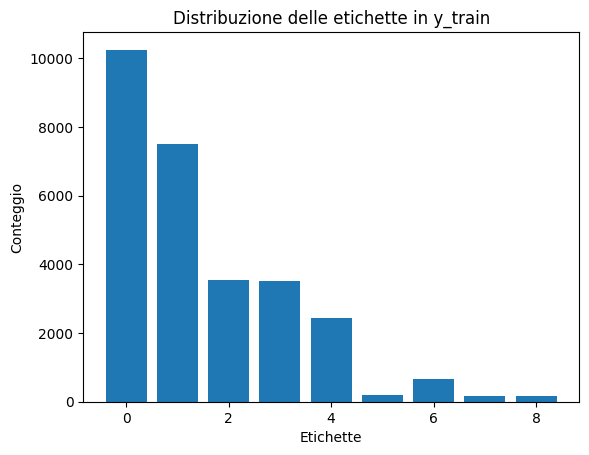

In [4]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.argmax(y_train, axis=1)

# Ottieni le etichette uniche e il conteggio di ciascuna
unique_labels, counts = np.unique(labels, return_counts=True)

# Stampa la distribuzione delle etichette
for label, count in zip(unique_labels, counts):
    print(f"Etichetta {label}: {count} occorrenze")

# Visualizza un grafico a barre della distribuzione
plt.bar(unique_labels, counts)
plt.xlabel('Etichette')
plt.ylabel('Conteggio')
plt.title('Distribuzione delle etichette in y_train')
plt.show()

In [48]:
test_set = ImageLoader(test_dir , test_csv)
X_test , y_test = test_set.load_data()

In [49]:
val_set = ImageLoader(val_dir , val_csv)
X_val , y_val = val_set.load_data()

In [8]:
'''# Cella per eliminare dati dove NF è >0, vanno inseriti i 3 csv relativi
import pandas as pd 
import os 

df = pd.read_csv("data/FER2013Train/label_train.csv")
df = df[df['NF']>0]
df'''

,Image name,dim,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF


In [9]:
'''df = pd.read_csv("data/FER2013Train/label_train.csv")

# Filtra le righe dove la colonna 'NF' è minore o uguale a 0
df_filtered = df[df['NF'] <= 0]

# Salva il nuovo DataFrame nel file CSV originale (sovrascrive il file)
df_filtered.to_csv("data/FER2013Train/label_train.csv", index=False)'''

In [25]:
# Questo serve per eliminare i nomi in base al nome nel dataframe risultante sopra
'''for image_name in df['Image name']:
    # Crea il percorso completo del file
    image_path = os.path.join(train_dir , image_name)
    
    # Verifica se l'immagine esiste e poi eliminala
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Eliminato: {image_path}")
    else:
        print(f"File non trovato: {image_path}")'''


File non trovato: images/2013Train\fer0000000.png
File non trovato: images/2013Train\fer0000001.png
File non trovato: images/2013Train\fer0000002.png
File non trovato: images/2013Train\fer0000003.png
File non trovato: images/2013Train\fer0000004.png
File non trovato: images/2013Train\fer0000005.png
File non trovato: images/2013Train\fer0000006.png
File non trovato: images/2013Train\fer0000007.png
File non trovato: images/2013Train\fer0000008.png
File non trovato: images/2013Train\fer0000009.png
File non trovato: images/2013Train\fer0000010.png
File non trovato: images/2013Train\fer0000011.png
File non trovato: images/2013Train\fer0000012.png
File non trovato: images/2013Train\fer0000013.png
File non trovato: images/2013Train\fer0000014.png
File non trovato: images/2013Train\fer0000015.png
File non trovato: images/2013Train\fer0000016.png
File non trovato: images/2013Train\fer0000018.png
File non trovato: images/2013Train\fer0000019.png
File non trovato: images/2013Train\fer0000020.png


In [7]:
from PIL import Image
import os

# Nome del file da aprire
file_name = "fer0026724.png"

# Percorso completo del file
file_path = os.path.join(train_dir, file_name)
img = Image.open(file_path)
img.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\aless\\Desktop\\fer+_finale\\images\\FER2013Train\\fer0026724.png'

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , Rescaling, BatchNormalization, GlobalAveragePooling2D

In [51]:
model = tf.keras.models.load_model('best_emotion_model.h5')
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,939 (1.67 MB)

 Trainable params: 436,489 (1.67 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Passo 1: Costruire il Modello Funzionale
inputs = Input(shape=(48, 48, 1))  # Input layer

# Layer convoluzionali
x = Rescaling(1./255)(inputs)  # Normalizzazione
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

# Flatten e aggiungi strati densi
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.6)(x)
outputs = Dense(9, activation='softmax')(x)  # 10 classi

# Creare il modello
model = Model(inputs=inputs, outputs=outputs)

# Passo 2: Compilare il Modello
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Per etichette one-hot
              metrics=['accuracy'])

# Passo 3: Visualizzare il riassunto del modello
model.summary()


Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,537 (1.66 MB)

 Trainable params: 434,473 (1.66 MB)

 Non-trainable params: 64 (256.00 B)

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',   # Monitora la perdita di validazione
                               patience=5,           # Numero di epoche senza miglioramenti prima di fermarsi
                               restore_best_weights=True)

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

In [60]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
print("Shape di X_train:", X_train.shape)  # Dovrebbe essere (num_samples, 48, 48, 1)
print("Shape di y_train:", y_train.shape)

Shape di X_train: (28447, 48, 48, 1)
Shape di y_train: (28447, 9)


In [61]:
history = model.fit(X_train, y_train,                  
                    epochs=50,
                    batch_size = 32,
                    validation_data=(X_val , y_val),
                    callbacks = [checkpoint]) 

Epoch 1/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 492s 549ms/step - accuracy: 0.6677 - loss: 1.3139 - val_accuracy: 0.7039 - val_loss: 1.1946
Epoch 2/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 483s 543ms/step - accuracy: 0.7014 - loss: 1.2278 - val_accuracy: 0.7336 - val_loss: 1.1108
Epoch 3/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 477s 536ms/step - accuracy: 0.7324 - loss: 1.1695 - val_accuracy: 0.7485 - val_loss: 1.0893
Epoch 4/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 481s 541ms/step - accuracy: 0.7436 - loss: 1.1496 - val_accuracy: 0.7392 - val_loss: 1.1205
Epoch 5/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 478s 537ms/step - accuracy: 0.7547 - loss: 1.1227 - val_accuracy: 0.7585 - val_loss: 1.0367
Epoch 6/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 484s 545ms/step - accuracy: 0.7696 - loss: 1.0963 - val_accuracy: 0.7569 - val_loss: 1.0520
Epoch 7/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 468s 527ms/step - accuracy: 0.7794 - loss: 1.0817 - val_accuracy: 0.7639 - val_loss: 1.0546
Epoch 8/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 474s 533ms/step - accuracy: 0.7915 -

KeyboardInterrupt: 

In [39]:
# Crea un DataFrame con i risultati, va re-runnato solo se viene re-runnato history
import pandas as pd

# Recupera i dati di addestramento
history_dict = history.history  # contiene 'loss', 'accuracy', 'val_loss', 'val_accuracy'
epochs = range(1, len(history_dict['accuracy']) + 1)

results_df = pd.DataFrame({
    'epoch': epochs,
    'loss': history_dict['loss'],
    'accuracy': history_dict['accuracy'],
    'val_loss': history_dict['val_loss'],
    'val_accuracy': history_dict['val_accuracy']
})

# Passo 2: Verifica se il file CSV esiste
csv_file = 'best_model.csv'

if os.path.exists(csv_file):
    # Se il file esiste, carica i dati esistenti e aggiungi i nuovi
    existing_df = pd.read_csv(csv_file)
    combined_df = pd.concat([existing_df, results_df], ignore_index=True)
else:
    # Se il file non esiste, usa solo i nuovi dati
    combined_df = results_df

# Passo 3: Salva i dati nel file CSV
combined_df.to_csv(csv_file, index=False)

print(f'I risultati sono stati salvati con successo in {csv_file}')

I risultati sono stati salvati con successo in modello_della_rocca.csv


In [53]:
prediction = model.predict(X_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step


In [54]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss sul set di test: {loss}')
print(f'Accuratezza sul set di test: {accuracy}')


110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.2362 - loss: 2.1936
Loss sul set di test: 2.1936659812927246
Accuratezza sul set di test: 0.23604783415794373


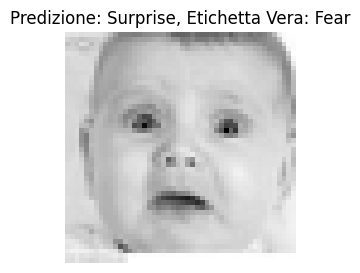

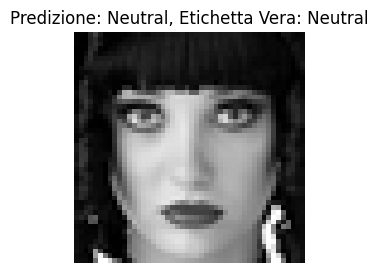

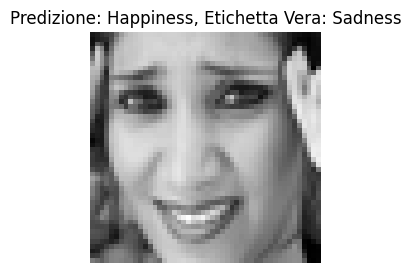

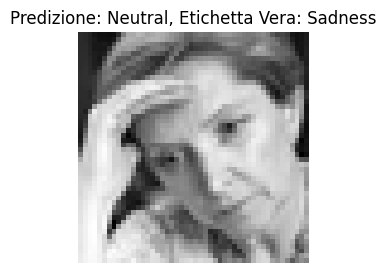

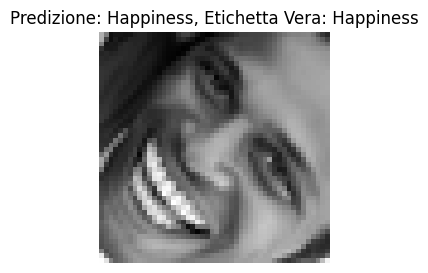

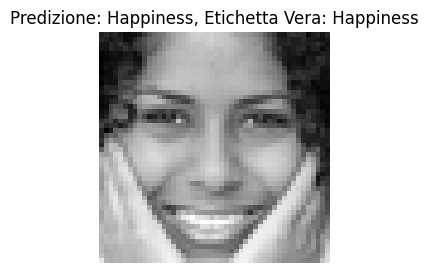

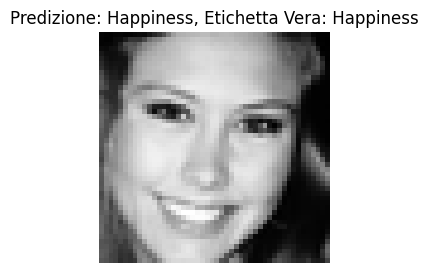

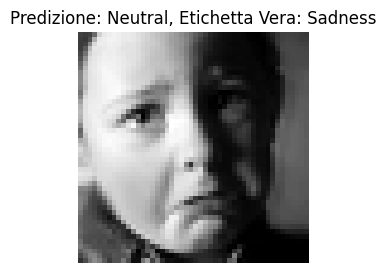

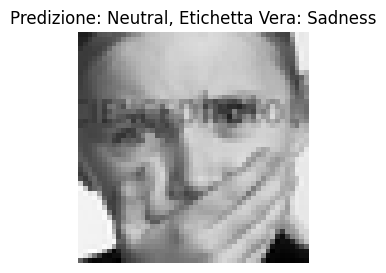

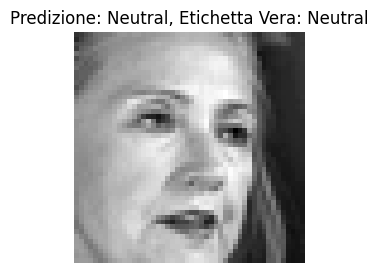

In [15]:
classi_predette = np.argmax(prediction, axis=1)
classi_vere = np.argmax(y_test, axis=1)
class_names = ['Neutral', 'Happiness', 'Surprise', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Contempt','Unknown']
num_images = 10
random_indices = np.random.choice(len(X_test), size=num_images, replace=False)
# Visualizza le prime 5 immagini con le predizioni
for i in random_indices:
    plt.figure(figsize=(3,3))
    plt.imshow(X_test[i], cmap='gray')  # Rimuovi 'cmap' se le immagini sono a colori
    plt.title(f"Predizione: {class_names[classi_predette[i]]}, Etichetta Vera: {class_names[classi_vere[i]]}")
    plt.axis('off')
    plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Supponendo che tu abbia già queste variabili:
# classi_predette = np.argmax(prediction, axis=1)
# classi_vere = np.argmax(y_test, axis=1)
# class_names = ['Neutral', 'Happiness', 'Surprise', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Contempt', 'Unknown']

# Calcola la matrice di confusione
cm = confusion_matrix(classi_vere, classi_predette)


NameError: name 'classi_vere' is not defined

In [43]:
# Visualizza la matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Vera')
plt.title('Matrice di Confusione')
plt.show()

NameError: name 'cm' is not defined

<Figure size 1000x800 with 0 Axes>